# An analysis of Tesla stock perfomance, compared with GM and Ford

In [2]:
import numpy as np
import pandas as pd
#import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import yfinance as yf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


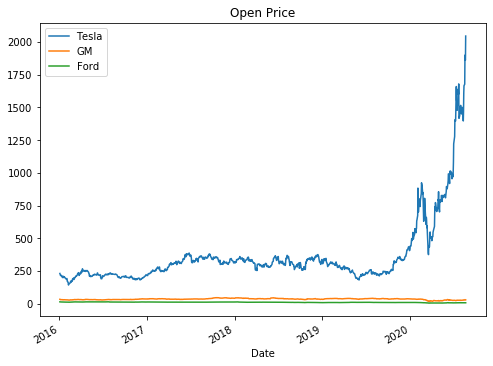

In [4]:
start=datetime.datetime(2016,1,1)
#end=
# 1. read data
ford=yf.download('F',start)
tesla=yf.download('TSLA',start)
gm=yf.download('GM',start)


tesla['Open'].plot(label='Tesla',figsize=(8,6),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

1067

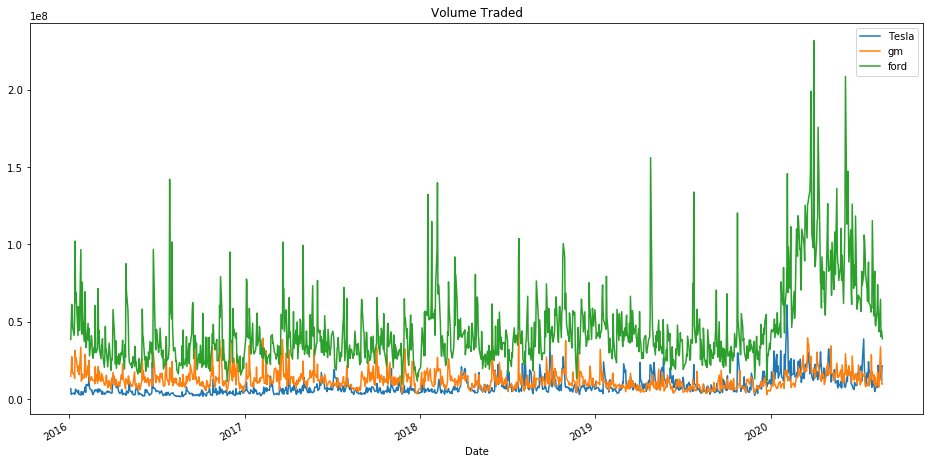

In [5]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()
ford['Volume'].argmax()

Text(0, 0.5, 'Total Traded')

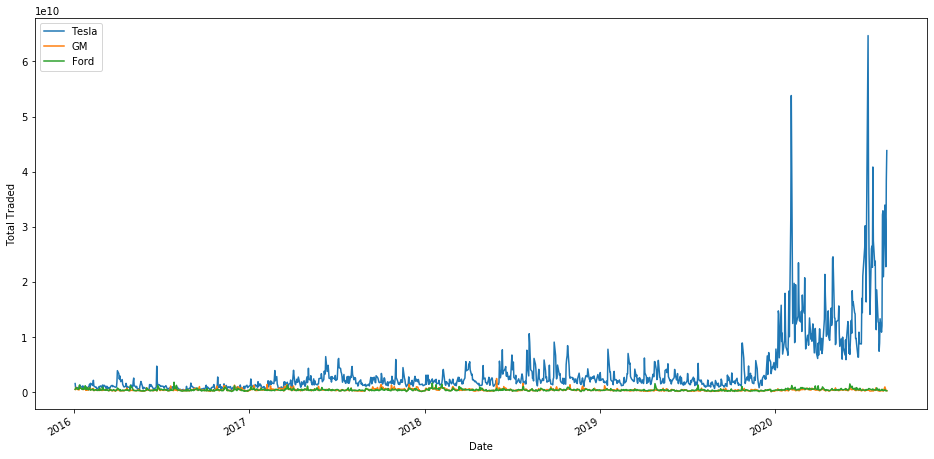

In [6]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

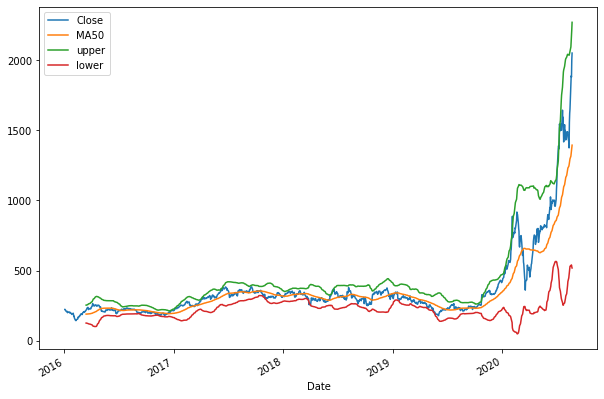

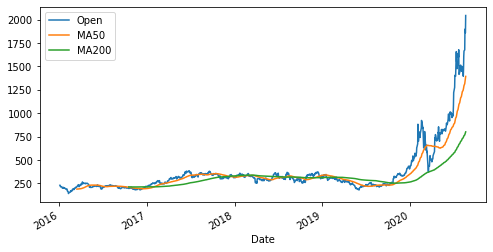

In [7]:
# 2. get average stock price
tesla['MA50'] = tesla['Close'].rolling(50).mean()
tesla['upper']=tesla['MA50']+3*tesla['Close'].rolling(50).std()
tesla['lower']=tesla['MA50']-3*tesla['Close'].rolling(50).std()
tesla[['Close','MA50','upper','lower']].plot(figsize=(10,7))


tesla['MA200'] = tesla['Close'].rolling(200).mean()
tesla[['Open','MA50','MA200']].plot(label='tesla',figsize=(8,4))

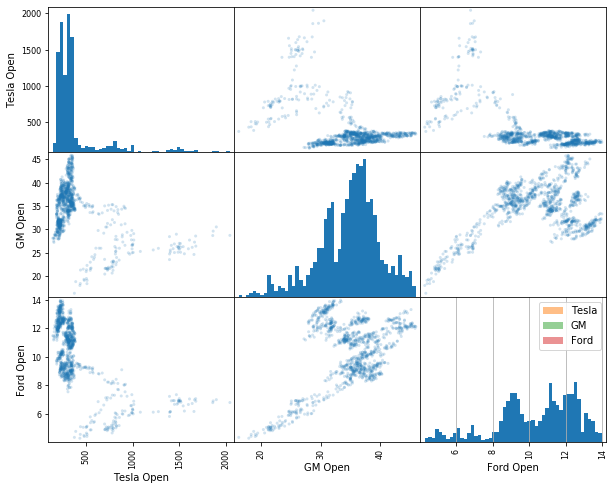

In [8]:
from pandas.plotting import scatter_matrix
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

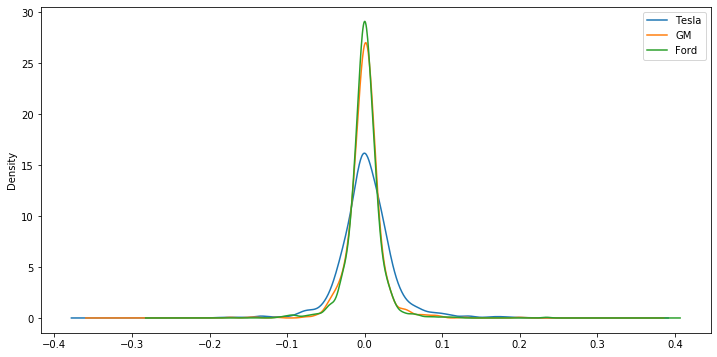

In [10]:
# KED plot
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

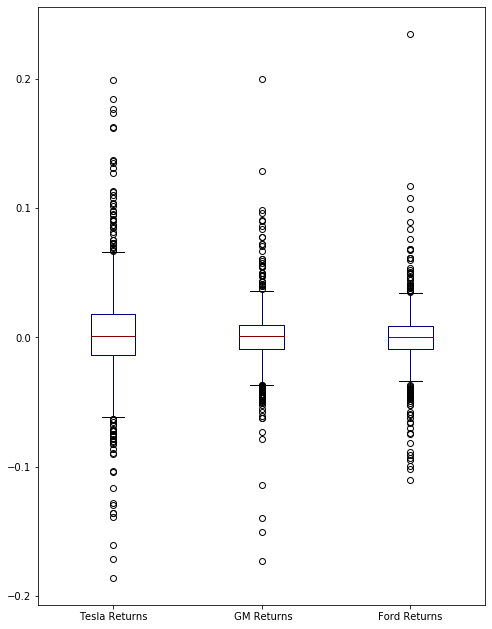

In [11]:
# box plots
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

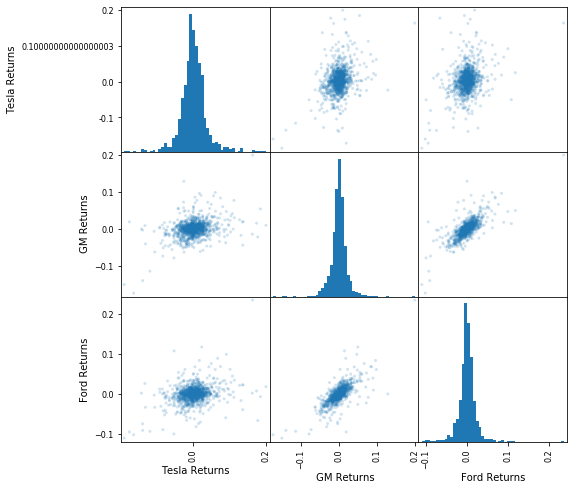

In [12]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

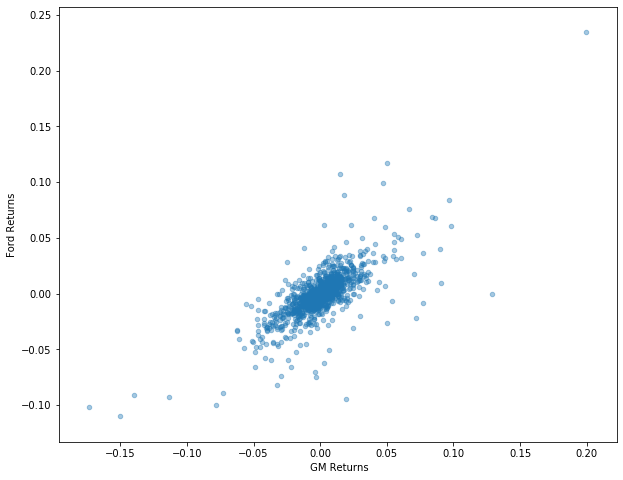

In [13]:
# compare GM and Ford
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

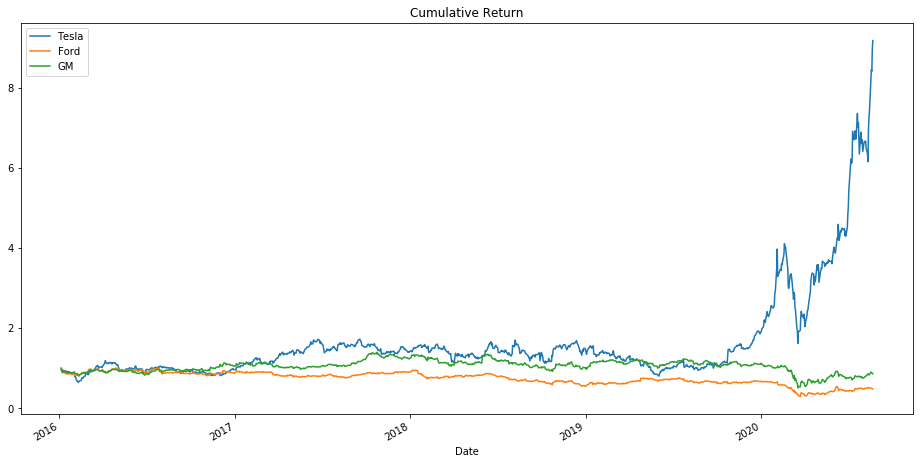

In [14]:
# cumulateive daily return
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

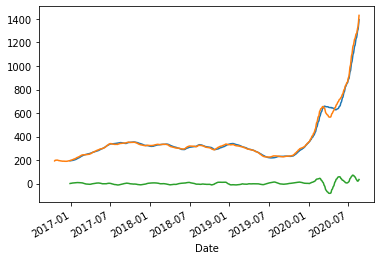

In [15]:
# Exponentially-weighted moving average
tesla.dropna(inplace=True)
tesla['50 days']=tesla['Close'].rolling(window=50).mean()
tesla['50 days'].plot()
tesla['EWMA12']=tesla['Close'].ewm(span=50).mean()
tesla['EWMA12'].plot()
xx=tesla['EWMA12']-tesla['50 days']
xx.plot()
